In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,validation_curve
from sklearn.metrics import accuracy_score,zero_one_loss,classification_report,confusion_matrix,precision_score,recall_score,f1_score,plot_roc_curve,plot_confusion_matrix
plt.style.use('dark_background')

Does the race of a candidate impact their likelihood of being contacted by prospective employers?

In [49]:
df = pd.read_csv('ResumeNames.csv').drop(['name','Unnamed: 0'],axis=1)

(to the extent deemed necessary)

In [50]:
df.head(5)

,gender,ethnicity,quality,call,city,jobs,experience,honors,volunteer,military,...,minimum,equal,wanted,requirements,reqexp,reqcomm,reqeduc,reqcomp,reqorg,industry
0,female,cauc,low,no,chicago,2,6,no,no,no,...,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
1,female,cauc,high,no,chicago,3,6,no,yes,yes,...,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
2,female,afam,low,no,chicago,1,6,no,no,no,...,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
3,female,afam,high,no,chicago,4,6,no,yes,no,...,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
4,female,cauc,high,no,chicago,3,22,no,no,no,...,some,yes,secretary,yes,yes,no,no,yes,yes,health/education/social services


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   gender        4870 non-null   object
 1   ethnicity     4870 non-null   object
 2   quality       4870 non-null   object
 3   call          4870 non-null   object
 4   city          4870 non-null   object
 5   jobs          4870 non-null   int64 
 6   experience    4870 non-null   int64 
 7   honors        4870 non-null   object
 8   volunteer     4870 non-null   object
 9   military      4870 non-null   object
 10  holes         4870 non-null   object
 11  school        4870 non-null   object
 12  email         4870 non-null   object
 13  computer      4870 non-null   object
 14  special       4870 non-null   object
 15  college       4870 non-null   object
 16  minimum       4870 non-null   object
 17  equal         4870 non-null   object
 18  wanted        4870 non-null   object
 19  requir

In [52]:
df.columns

Index(['gender', 'ethnicity', 'quality', 'call', 'city', 'jobs', 'experience',
       'honors', 'volunteer', 'military', 'holes', 'school', 'email',
       'computer', 'special', 'college', 'minimum', 'equal', 'wanted',
       'requirements', 'reqexp', 'reqcomm', 'reqeduc', 'reqcomp', 'reqorg',
       'industry'],
      dtype='object')

In [53]:
df.minimum = df.minimum.replace({'some':2,'none':0}).astype(float)
numeric = ['jobs','experience','minimum']
scaler = MinMaxScaler()
y = df.pop('call')
X = pd.concat([pd.DataFrame(scaler.fit_transform(df[numeric]),columns=numeric),
               pd.get_dummies(df.drop(numeric,axis=1),drop_first=True)],axis=1)

For preprocessing, I mapped non-numeric responses in the required minimum experience column (replaced 'none' with 0 and 'some' replaced with 0) in order to keep this feature numeric. I then applied min/max scaling to continuous features and created dummy variables of the categorical features.
## Data splitting

In [54]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.3,random_state=42)
print(f'X_train:\n\t{X_train.shape}\nX_test:\n\t{X_test.shape}\ny_train:\n\t{y_train.shape}\ny_test:\n\t\
{y_test.shape}')

X_train:
	(3409, 34)
X_test:
	(1461, 34)
y_train:
	(3409,)
y_test:
	(1461,)


## Model construction (a decision tree and a random forest)

In [55]:
tree = DecisionTreeClassifier(random_state=42)
tree_fitted = tree.fit(X_train,y_train)
y_train_predict = tree_fitted.predict(X_train)
y_test_predict = tree_fitted.predict(X_test)

print('Decision Tree\n')
print(f'Train Accuracy:\n\t{accuracy_score(y_train,y_train_predict)}\nTest Accuracy:\n\t\
{accuracy_score(y_test,y_test_predict)}')

Decision Tree

Train Accuracy:
	0.9917864476386037
Test Accuracy:
	0.8569472963723477


In [56]:
forest = RandomForestClassifier(random_state=42)
forest_fitted = forest.fit(X_train,y_train)
y_train_predict = forest_fitted.predict(X_train)
y_test_predict = forest_fitted.predict(X_test)

print('Random Forest\n')
print(f'Train Accuracy:\n\t{accuracy_score(y_train,y_train_predict)}\nTest Accuracy:\n\t\
{accuracy_score(y_test,y_test_predict)}')

Random Forest

Train Accuracy:
	0.9917864476386037
Test Accuracy:
	0.921286789869952


## Hyperparameter turning 

In [57]:
grid = {'max_depth':[d for d in range(1,15)],
        'max_features':[f for f in range(1,len(X_train.columns))],
        'splitter':['best','random']}
GRID_1 = GridSearchCV(tree_fitted,grid,cv=8,verbose=2).fit(X_train,y_train)

Fitting 8 folds for each of 924 candidates, totalling 7392 fits
[CV] END .........max_depth=1, max_features=1, splitter=best; total time=   0.0s
[CV] END .........max_depth=1, max_features=1, splitter=best; total time=   0.0s
[CV] END .........max_depth=1, max_features=1, splitter=best; total time=   0.0s
[CV] END .........max_depth=1, max_features=1, splitter=best; total time=   0.0s
[CV] END .........max_depth=1, max_features=1, splitter=best; total time=   0.0s
[CV] END .........max_depth=1, max_features=1, splitter=best; total time=   0.0s
[CV] END .........max_depth=1, max_features=1, splitter=best; total time=   0.0s
[CV] END .........max_depth=1, max_features=1, splitter=best; total time=   0.0s
[CV] END .......max_depth=1, max_features=1, splitter=random; total time=   0.0s
[CV] END .......max_depth=1, max_features=1, splitter=random; total time=   0.0s
[CV] END .......max_depth=1, max_features=1, splitter=random; total time=   0.0s
[CV] END .......max_depth=1, max_features=1, 

In [58]:
GRID_1.best_params_

{'max_depth': 4, 'max_features': 30, 'splitter': 'random'}

In [59]:
grid = {'max_depth':[d for d in range(1,15)],
        'max_features':[f for f in range(1,len(X_train.columns))],
        'n_estimators':[50,100,150],
        'n_jobs':[7]}
GRID_2 = GridSearchCV(forest_fitted,grid,cv=8,verbose=2).fit(X_train,y_train)

Fitting 8 folds for each of 1386 candidates, totalling 11088 fits
[CV] END max_depth=1, max_features=1, n_estimators=50, n_jobs=7; total time=   2.6s
[CV] END max_depth=1, max_features=1, n_estimators=50, n_jobs=7; total time=   0.3s
[CV] END max_depth=1, max_features=1, n_estimators=50, n_jobs=7; total time=   0.3s
[CV] END max_depth=1, max_features=1, n_estimators=50, n_jobs=7; total time=   0.3s
[CV] END max_depth=1, max_features=1, n_estimators=50, n_jobs=7; total time=   0.3s
[CV] END max_depth=1, max_features=1, n_estimators=50, n_jobs=7; total time=   0.3s
[CV] END max_depth=1, max_features=1, n_estimators=50, n_jobs=7; total time=   0.3s
[CV] END max_depth=1, max_features=1, n_estimators=50, n_jobs=7; total time=   0.3s
[CV] END max_depth=1, max_features=1, n_estimators=100, n_jobs=7; total time=   0.3s
[CV] END max_depth=1, max_features=1, n_estimators=100, n_jobs=7; total time=   0.3s
[CV] END max_depth=1, max_features=1, n_estimators=100, n_jobs=7; total time=   0.3s
[CV] EN

In [61]:
GRID_2.best_params_

{'max_depth': 14, 'max_features': 1, 'n_estimators': 50, 'n_jobs': 7}

## final model

In [63]:
tree = DecisionTreeClassifier(max_depth=4,max_features=30,splitter='random',random_state=42)
tree_fitted = tree.fit(X_train,y_train)
y_train_predict = tree_fitted.predict(X_train)
y_test_predict = tree_fitted.predict(X_test)

print('Best Decision Tree\n')
print(f'Train Accuracy:\n\t{accuracy_score(y_train,y_train_predict)}\nTest Accuracy:\n\t\
{accuracy_score(y_test,y_test_predict)}')

Best Decision Tree

Train Accuracy:
	0.9187444998533294
Test Accuracy:
	0.920602327173169


In [74]:
forest = RandomForestClassifier(max_depth=14,max_features=1,n_estimators=50,random_state=42)
forest_fitted = forest.fit(X_train,y_train)
y_train_predict = forest_fitted.predict(X_train)
y_test_predict = forest_fitted.predict(X_test)

print('Best Random Forest\n')
print(f'Train Accuracy:\n\t{accuracy_score(y_train,y_train_predict)}\nTest Accuracy:\n\t\
{accuracy_score(y_test,y_test_predict)}')

Best Random Forest

Train Accuracy:
	0.9477852742739806
Test Accuracy:
	0.9267624914442163


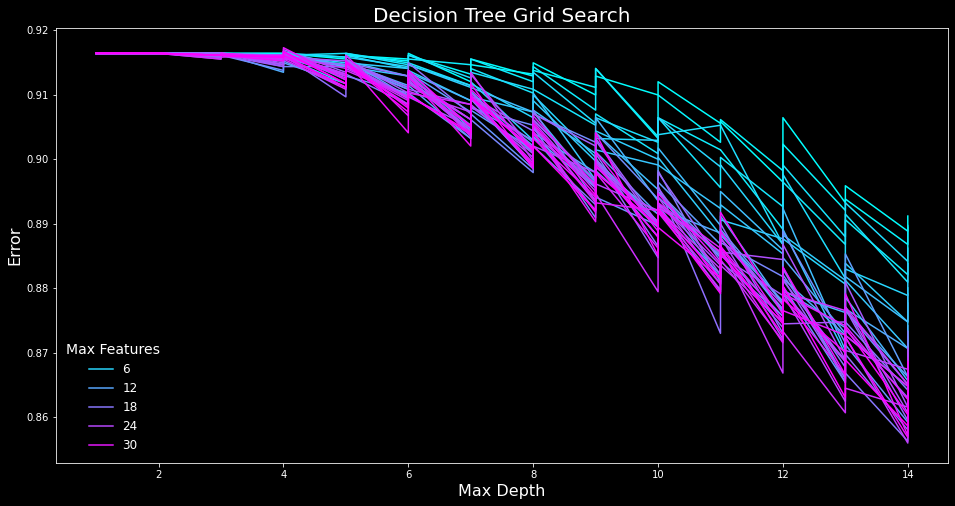

In [82]:
plot_tree_df = pd.DataFrame(GRID_1.cv_results_)
plot_tree_df.mean_test_score=plot_tree_df.mean_test_score

fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(data=plot_tree_df,
             x='param_max_depth',
             y='mean_test_score',
             hue='param_max_features',
             palette='cool',
             estimator=None,
             ax=ax)
plt.xlabel('Max Depth',fontsize=16)
plt.ylabel('Error',fontsize=16)
plt.title('Decision Tree Grid Search',fontsize=20)
ax.legend(title='Max Features',title_fontsize=14,fontsize=12,frameon=False,loc='lower left')
plt.show()

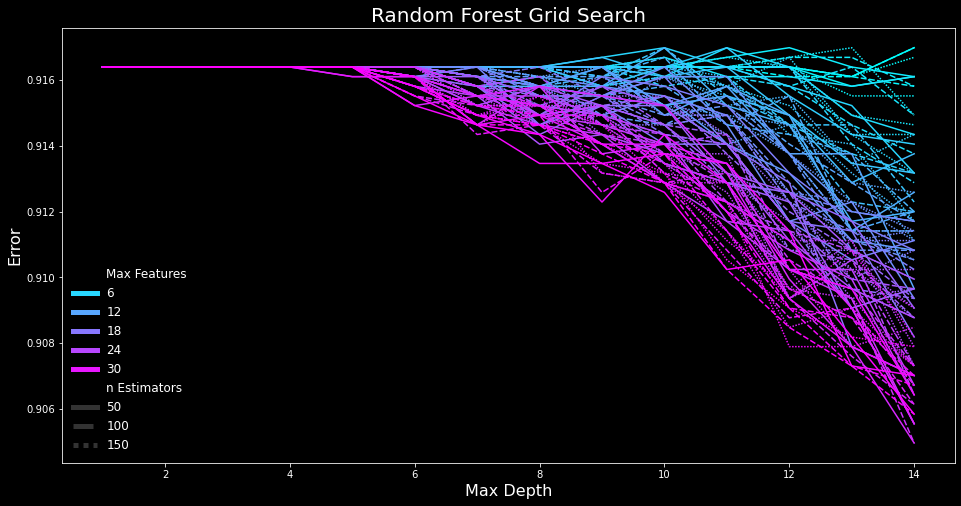

In [92]:
plot_forest_df = pd.DataFrame(GRID_2.cv_results_)
plot_forest_df.mean_test_score=plot_forest_df.mean_test_score
plot_forest_df.param_n_estimators = plot_forest_df.param_n_estimators.astype('category')
plot_forest_df.rename(columns={"param_max_features":"Max Features",
                               "param_n_estimators": "n Estimators"},inplace=True)

fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(data=plot_forest_df,
             x='param_max_depth',
             y='mean_test_score',
             hue='Max Features',
             style='n Estimators',
             palette='cool',
             legend='auto',
             ax=ax)
plt.xlabel('Max Depth',fontsize=16)
plt.ylabel('Error',fontsize=16)
plt.title('Random Forest Grid Search',fontsize=20)
leg = ax.legend(fontsize=12,frameon=False,loc='lower left')
for legobj in leg.legendHandles:
    legobj.set_linewidth(5)
plt.show()

After looking at the error-rate plot for the random forest, it appears that having more feature was optimal. I ran the model using 30 features and did indeed get better results for the train data, but the training predictions suffered. Because the max depth was the highest option in my grid, I tried a few models with increased max depth, but this did not improve the model.

In [91]:
forest = RandomForestClassifier(max_depth=14,max_features=30,n_estimators=50,random_state=42)
forest_fitted = forest.fit(X_train,y_train)
y_train_predict = forest_fitted.predict(X_train)
y_test_predict = forest_fitted.predict(X_test)

print('Best Random Forest\n')
print(f'Train Accuracy:\n\t{accuracy_score(y_train,y_train_predict)}\nTest Accuracy:\n\t\
{accuracy_score(y_test,y_test_predict)}')

Best Random Forest

Train Accuracy:
	0.9826928718099149
Test Accuracy:
	0.919233401779603


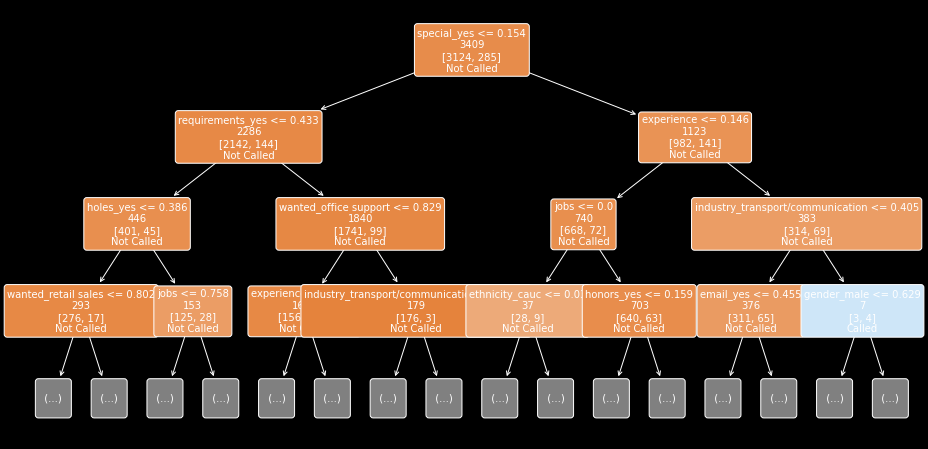

In [94]:
fig, ax = plt.subplots(figsize=(16,8))
plot_tree(tree_fitted,
          feature_names=X_train.columns,
          class_names=['Not Called','Called'],
          max_depth=3,
          filled=True,
          rounded=True,
          fontsize=10,
          label='none',
          impurity=False,
          ax=ax)
plt.show()

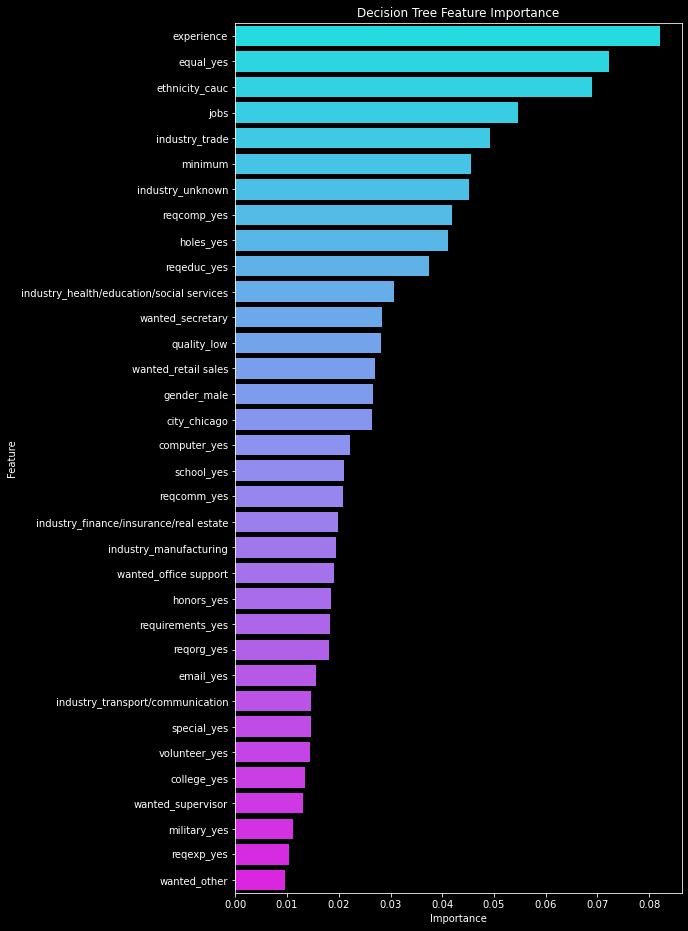

In [95]:
hue_dict = {f:'Yes' if (f=='ethnicity_cauc' or f=='gender_male') else 'No' for f in X_train.columns}
importance = pd.DataFrame({'Importance':tree_fitted.feature_importances_,
                           'Feature':X_train.columns})
importance.sort_values('Importance',inplace=True,ascending=False)
importance['hue'] = importance.Feature.map(hue_dict)

fig, ax = plt.subplots(figsize=(8,16))
sns.barplot(data=importance,
            y="Feature",
            x="Importance",
            palette='cool',
            ax=ax)
plt.title('Decision Tree Feature Importance')
plt.show()

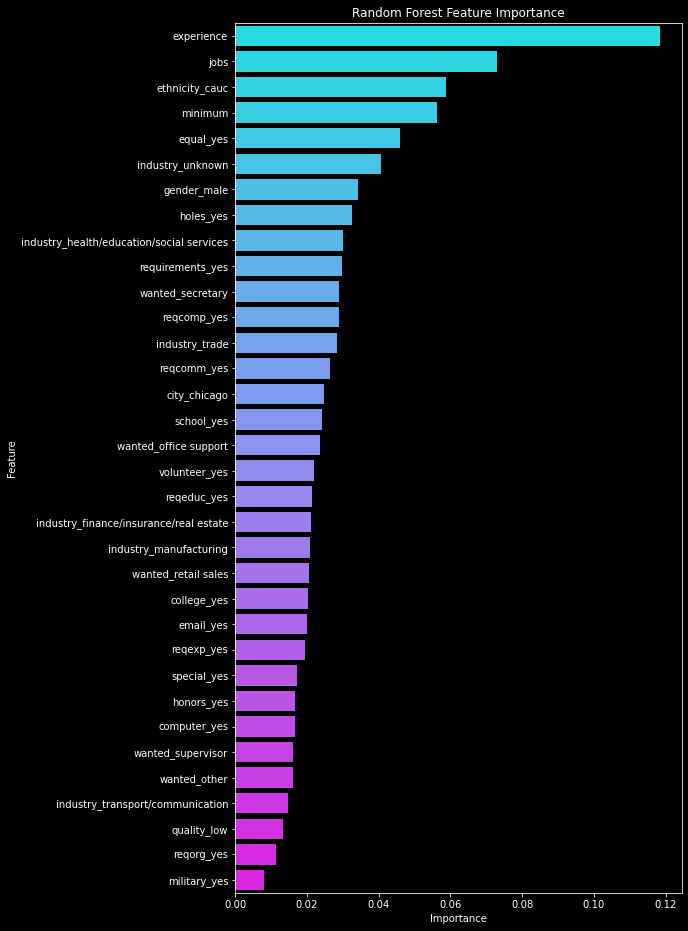

In [96]:
hue_dict = {f:'Yes' if (f=='ethnicity_cauc' or f=='gender_male') else 'No' for f in X_train.columns}
importance = pd.DataFrame({'Importance':forest_fitted.feature_importances_,
                           'Feature':X_train.columns})
importance.sort_values('Importance',inplace=True,ascending=False)
importance['hue'] = importance.Feature.map(hue_dict)

fig, ax = plt.subplots(figsize=(8,16))
sns.barplot(data=importance,
            y="Feature",
            x="Importance",
            palette='cool',
            ax=ax)
plt.title('Random Forest Feature Importance')
plt.show()

Both models performed comparably well on the new test data, though the random forest did have a slight drop in performance indicating slight overfitting. Overall, the random forest performed marginally better, which is to be expected -- the ensemble model addresses some of the drawbacks of decision trees (an oversensitivity to minor changes in data).

As far as answering my research question, both models found race to be a factor of high importance, ranking 3rd in in importance for both models. This evidiences bias in hiring practices. Both found that a candidates experience to be the most important.